In [2]:
import numpy as np
import pandas as pd

In [3]:
#load file
filename = "df.csv"
data = pd.read_csv(filename)
data

,posX,posY,time,height,width,timestamp
0,624,225,0.00000,41.726074,41.726074,66426.0
1,590,218,15.01001,41.726074,41.726074,66443.0
2,557,217,31.01001,41.726074,41.726074,66459.0
3,530,218,48.01001,41.726074,41.726074,66476.0
4,504,223,65.01001,41.726074,41.726074,66493.0
...,...,...,...,...,...,...
7535,650,480,125301.01001,41.726074,41.726074,191731.0
7536,650,479,125351.01001,41.726074,41.726074,191781.0
7537,650,478,125400.01001,41.726074,41.726074,191806.0
7538,650,477,125417.01001,41.726074,41.726074,191848.0


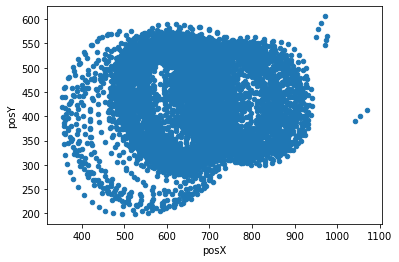

In [29]:
data.plot.scatter(x="posX", y="posY")

In [27]:
def getPercentageX(x):
    distance = data['posX'].max() - data['posX'].min()
    return ((getDistanceX(x)*1.0)/distance)*100

def getPercentageY(y):
    distance = data['posY'].max() - data['posY'].min()
    return ((getDistanceY(y)* 1.0)/distance)*100

def getDistanceX(x):
    return x - data['posX'].min()

def getDistanceY(y):
    return y - data['posY'].min()

In [42]:
#data: csv read from pandas
#posX: name of the column posX (posX or the relative)
#posY: name of the column posY (posY or the relative)

def getTotalDistance(data, posX, posY):
    distance = 0
    for i in range(data[posX].count() -1):
        point1X = data[posX][i]
        point1Y = data[posY][i]

        point2X = data[posX][i+1]
        point2Y = data[posY][i+1]

        width = point2X - point1X
        height = point2Y - point1Y
        distance += ((width**2) + (height**2))**(1/2)
    return distance

In [44]:
#obtain the size of the bounding box
def bouning_size(data):
    width = data['posX'].max() - data['posX'].min() 
    height = data['posY'].max() - data['posY'].min()
    return (width, height)

In [45]:
#obtain limit points of bounding box
def bounding_points(data):
    Xmax = data['posX'].max()
    Ymax = data['posY'].max()
    Xmin = data['posX'].min()
    Ymin = data['posY'].min()
    return ((Xmin, Ymin),(Xmin,Ymax),(Xmax,Ymax),(Xmax,Ymin))

In [50]:
data['relativePorcentageX'] = data.apply(lambda x: getPercentageX(x['posX']), axis=1)
data['relativePorcentageY'] = data.apply(lambda x: getPercentageY(x['posY']), axis=1)
data['relativeDistanceX'] = data.apply(lambda x: getDistanceX(x['posX']), axis=1)
data['relativeDistanceY'] = data.apply(lambda x: getDistanceY(x['posY']), axis=1)

In [35]:
data

,posX,posY,time,height,width,timestamp,relativePorcentageX,relativePorcentageY,relativeDistanceX,relativeDistanceY
0,624,225,0.00000,41.726074,41.726074,66426.0,37.675070,6.388206,269.0,26.0
1,590,218,15.01001,41.726074,41.726074,66443.0,32.913165,4.668305,235.0,19.0
2,557,217,31.01001,41.726074,41.726074,66459.0,28.291317,4.422604,202.0,18.0
3,530,218,48.01001,41.726074,41.726074,66476.0,24.509804,4.668305,175.0,19.0
4,504,223,65.01001,41.726074,41.726074,66493.0,20.868347,5.896806,149.0,24.0
...,...,...,...,...,...,...,...,...,...,...
7535,650,480,125301.01001,41.726074,41.726074,191731.0,41.316527,69.041769,295.0,281.0
7536,650,479,125351.01001,41.726074,41.726074,191781.0,41.316527,68.796069,295.0,280.0
7537,650,478,125400.01001,41.726074,41.726074,191806.0,41.316527,68.550369,295.0,279.0
7538,650,477,125417.01001,41.726074,41.726074,191848.0,41.316527,68.304668,295.0,278.0


In [51]:
print("Total Distance: ",getTotalDistance(data, 'posX', 'posY'))
print("Porcentage Total Distance: ", getTotalDistance(data, 'relativePorcentageX', 'relativePorcentageY'))
print("Bounding box size: ", bouning_size(data))
print("Bounding box points: ", bounding_points(data))

Total Distance:  146522.01794300225
Porcentage Total Distance:  28548.257091498755
Bounding box size:  (714, 407)
Bounding box points:  ((355, 199), (355, 606), (1069, 606), (1069, 199))


In [53]:
data['posX'].max() - data['posX'].min()

714